DATASET : https://www.kaggle.com/datasets/lovishbansal123/titanic-dataset

Name Muhammad Aqeel
Task no 1

Importing Libiraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

Load the DataSets

In [2]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

Handle Missing Value --> Data PreProcessing 

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

C:\Users\Muhammad Aqeel\AppData\Local\Temp\ipykernel_10280\2855616432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)


In [7]:
titanic['Cabin'].fillna(method="bfill",inplace=True)


C:\Users\Muhammad Aqeel\AppData\Local\Temp\ipykernel_10280\869272761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Cabin'].fillna(method="bfill",inplace=True)
C:\Users\Muhammad Aqeel\AppData\Local\Temp\ipykernel_10280\869272761.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Cabin'].fillna(method="bfill",inplace=True)


In [8]:
titanic['Embarked'].fillna(method="ffill",inplace=True)


C:\Users\Muhammad Aqeel\AppData\Local\Temp\ipykernel_10280\1163045874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(method="ffill",inplace=True)
C:\Users\Muhammad Aqeel\AppData\Local\Temp\ipykernel_10280\1163045874.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Embarked'].fillna(method="ffill",inplace=True)


In [9]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

Duplicated Row Value

In [10]:
print(titanic.duplicated().sum())

0


Check DataTypes

In [11]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Numerical Summary Of Data

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Categories Features

In [13]:
dataCategoriesCol = titanic.select_dtypes(include=["object","category"]).columns

In [14]:
titanic[dataCategoriesCol].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,890,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,C78,S
freq,1,577,7,33,644


Visualize data distributions using histograms 

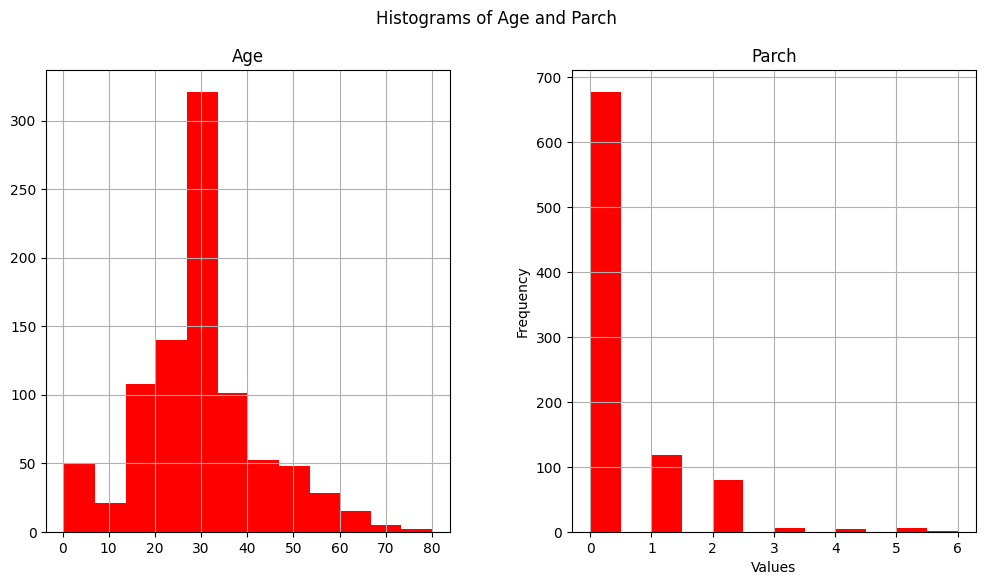

In [15]:

titanic[['Age', 'Parch']].hist(bins=12, figsize=(12, 6), color='red')
plt.suptitle('Histograms of Age and Parch')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()


Visualize data distributions using box plot

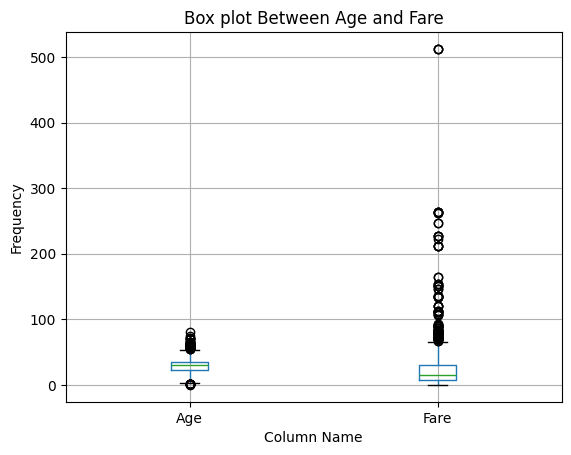

In [16]:
titanic[['Age','Fare']].boxplot()
plt.title("Box plot Between Age and Fare")
plt.xlabel("Column Name")
plt.ylabel("Frequency")
plt.show()

Explore relationships between features using scatter plots.

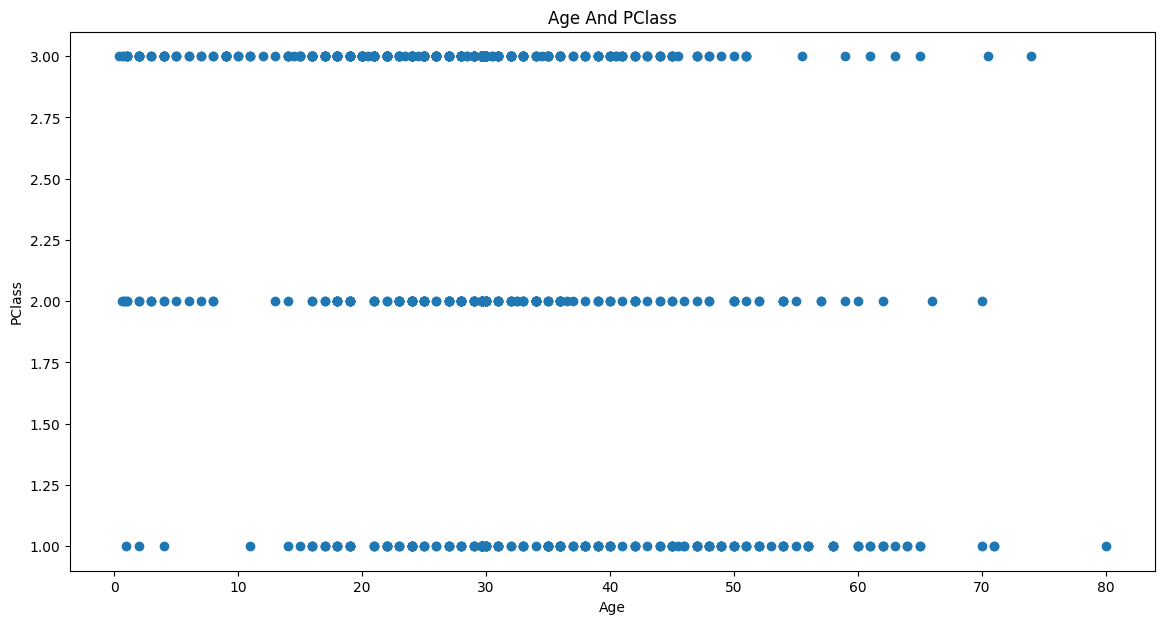

In [17]:
plt.figure(figsize=(14,7))
plt.scatter(titanic['Age'],titanic['Pclass'])
plt.title("Age And PClass")
plt.xlabel("Age")
plt.ylabel("PClass")
plt.show()

Corelation Matrix

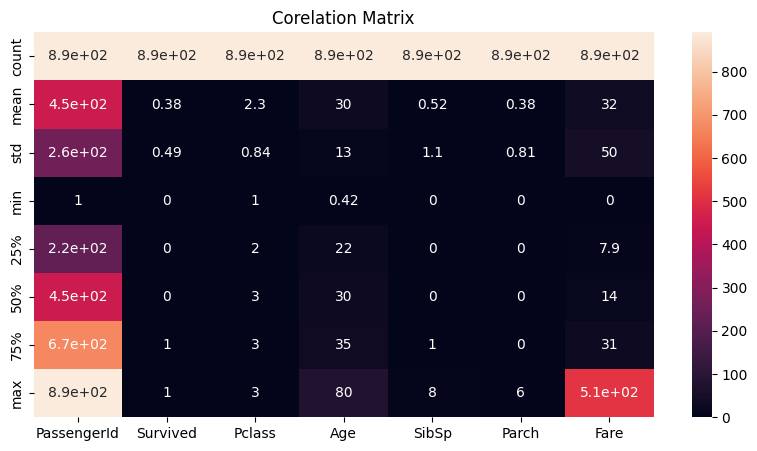

In [18]:
plt.figure(figsize=(10,5))
sn.heatmap(titanic.describe(), annot=True)
plt.title("Corelation Matrix")
plt.show()

Create new features from existing data

New Feature from existing data --> Make the new feature by combining the exitsing feature

In [19]:
#Make Family Size
#Family Size = SibSip --> number of sibling + Parch --> Parents + Its self
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Age Categories = 12 --> Teenager , 18 --> Adult , 60 --> Senior Person
titanic['AgeCategory'] = pd.cut(titanic['Age'],bins=[12,18,60,titanic['Age'].max()],labels=['Teenager', 'Adult', 'Senior'])

# Fare Per Person = Fare --> Total Whole Fare / Family Size --> Whole Family Size = Number of sibling + Parent + Its Self
titanic['FarePerson'] = titanic['Fare'] /titanic['FamilySize']



In [20]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'AgeCategory', 'FarePerson'],
      dtype='object')

In [21]:
titanic[titanic['AgeCategory'] == "Teenager"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeCategory,FarePerson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C,2,Teenager,15.03540
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,D56,S,1,Teenager,7.85420
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,A6,Q,1,Teenager,8.02920
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,D33,S,3,Teenager,6.00000
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,D33,C,2,Teenager,5.62085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,C92,S,1,Teenager,10.50000
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,C92,S,1,Teenager,8.66250
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,2,Teenager,19.70000
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,E17,S,2,Teenager,4.67500


One-hot encode categorical variables.


In [22]:
encoder = OneHotEncoder()

In [23]:
genderEncoder = encoder.fit_transform(titanic['Sex'].values.reshape(-1,1)).toarray()

In [24]:
genderEncoder

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [25]:
emb = encoder.fit_transform(titanic['Embarked'].values.reshape(-1,1)).toarray()

In [26]:
emb

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [27]:
titanic['Male'] = genderEncoder[:, 0]
titanic['Female'] = genderEncoder[:, 1]
titanic['Embarked_S'] = emb[:, 0]
titanic['Embarked_C'] = emb[:, 1]
titanic['Embarked_Q'] = emb[:, 2]

In [28]:
mydata = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Male', 'Female', 'Embarked_S', 'Embarked_C', 'Embarked_Q']]

Standardize numerical features.

In [29]:
numeric = titanic.select_dtypes(include=['int64','float64'])

In [30]:
stand = StandardScaler()

In [31]:
scaled = stand.fit_transform(numeric)

In [32]:
# mydata[numeric.columns] = scaled

If the target variable is imbalanced, use resampling techniques to address the 
imbalance

removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling)

In [33]:
majorityClass = titanic[titanic['Survived'] == 0] #High Majority Class

In [34]:
minorityClass = titanic[titanic['Survived'] == 1] #Minority Class

In [35]:
minoritySample = resample(minorityClass,
                          replace = True,
                          n_samples = majorityClass.size,
                          random_state = 32)

In [36]:
MinorityMajority = pd.concat([minoritySample,majorityClass])

In [37]:
MinorityMajority['Survived'].value_counts()

Survived
1    10980
0      549
Name: count, dtype: int64

Next Columns

In [38]:
male = titanic[titanic['Sex'] == "male"] # Majority
female = titanic[titanic['Sex'] == "female"] # Minority

In [39]:
genderMinority = resample(female,
                          replace=True,
                          n_samples=male.size,
                          random_state=30)

In [40]:
bothGender = pd.concat([genderMinority,male])

In [41]:
bothGender['Sex'].value_counts()

Sex
female    11540
male        577
Name: count, dtype: int64

In [42]:
mydata.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Male', 'Female', 'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [43]:
mydata.to_csv("myTitanicDataset.csv",index=False)